### **Importamos las librerias**

- Usamos **`requests`** para conectarnos a la *API CoinGecko* y obtener información actualizada sobre las criptomonedas, como precios, volúmenes de negociación, capitalización de mercado, etc.
- **`pandas`** se utiliza para cargar y manipular los datos obtenidos de la API CoinGecko, realizar análisis exploratorio de datos (EDA), y preparar los datos para su almacenamiento en una base de datos SQL.
- **`matplotlib.pyplot`** y **`seaborn`** para crear visualizaciones en el EDA.
- Se usa **`locale`** en este caso para que los números y monedas se formateen de acuerdo con las convenciones en inglés estadounidense, debido a que se muestran precios en **USD** (dólares estadounidenses).

In [2]:
import requests
import locale
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


- Cargar los archivos CSV en DtaFrames separados para luego unirlos en uno solo **df_cryptocurrency** y guardarlo con el nobre *"cryptocurrency.csv"*

In [3]:
df_stable = pd.read_csv('stable_data2.csv')
df_top = pd.read_csv('top_historical.csv')

df_cryptocurrency = pd.concat([df_stable, df_top], ignore_index=True)

df_cryptocurrency.to_csv('cryptocurrency.csv', index=False)

- Ver las primera filas del dataset.

In [4]:
df_cryptocurrency.head(10)

,Date,Price,MarketCap,TotalVolume,Currency
0,2023-08-01,0.999942,8.381631e+10,2.537704e+10,tether
1,2023-08-02,0.999242,8.388853e+10,2.364385e+10,tether
2,2023-08-03,0.998680,8.384106e+10,1.789421e+10,tether
3,2023-08-04,0.998912,8.371969e+10,1.129369e+10,tether
4,2023-08-05,0.998987,8.381698e+10,8.632620e+09,tether
5,2023-08-06,0.998320,8.375169e+10,1.134571e+10,tether
6,2023-08-07,0.998873,8.346456e+10,2.271317e+10,tether
7,2023-08-08,0.999945,8.353467e+10,2.519409e+10,tether
8,2023-08-09,0.999712,8.349694e+10,1.876730e+10,tether
9,2023-08-10,0.998899,8.344563e+10,1.089010e+10,tether


- Verificar los tipos de datos.

In [5]:
df_cryptocurrency.dtypes

Date            object
Price          float64
MarketCap      float64
TotalVolume    float64
Currency        object
dtype: object

- Ver como esta compuesto el dataset.

In [6]:
df_cryptocurrency.shape

(195, 5)

- Buscar si hay datos duplicados y valores nulos.

In [7]:
duplicates = df_stable.duplicated()
print(f"{duplicates.sum()}")

0


In [8]:
df_stable.isnull().sum()

Date           0
Price          0
MarketCap      0
TotalVolume    0
Currency       0
dtype: int64

- Convertir la columna "Date" a tipo datetime.

In [9]:
df_cryptocurrency["Date"] = pd.to_datetime(df_cryptocurrency["Date"], format="mixed", dayfirst=True)

- Establecer el locale para el formateo de los números
- Definir una función para formatear números con el separador de miles.
- Aplicar el formato a las columnas numéricas, no se agrega Price para mantenerlo como precios en usd.

In [10]:
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

def format_with_thousands_separator(number):
    return locale.format_string('%d', number, grouping=True)

numeric_columns = ['MarketCap', 'TotalVolume']

for column in numeric_columns:
    df_cryptocurrency[column] = df_cryptocurrency[column].apply(format_with_thousands_separator)

- Verificamos los cambios.

In [11]:
df_cryptocurrency.head()

,Date,Price,MarketCap,TotalVolume,Currency
0,2023-08-01,0.999942,83.816.313.473,25.377.039.033,tether
1,2023-08-02,0.999242,83.888.527.906,23.643.854.095,tether
2,2023-08-03,0.998680,83.841.060.938,17.894.208.326,tether
3,2023-08-04,0.998912,83.719.693.334,11.293.689.345,tether
4,2023-08-05,0.998987,83.816.979.241,8.632.620.439,tether


## **Visualizaciones**

1. Scatter plot:: esta gráfica muestra la relación entre el precio, el capital de mercado y el volumen total de diferentes criptomonedas. 
- Debido a que en el dataset se repite la moneda porque son los datos obtenidos en periodos de tiempo, primero hacemos una lista de las cryptomonedas unicas, luego seleccionamos una muestra para graficar, en este caso 8, creamos las combinas y graficamos.

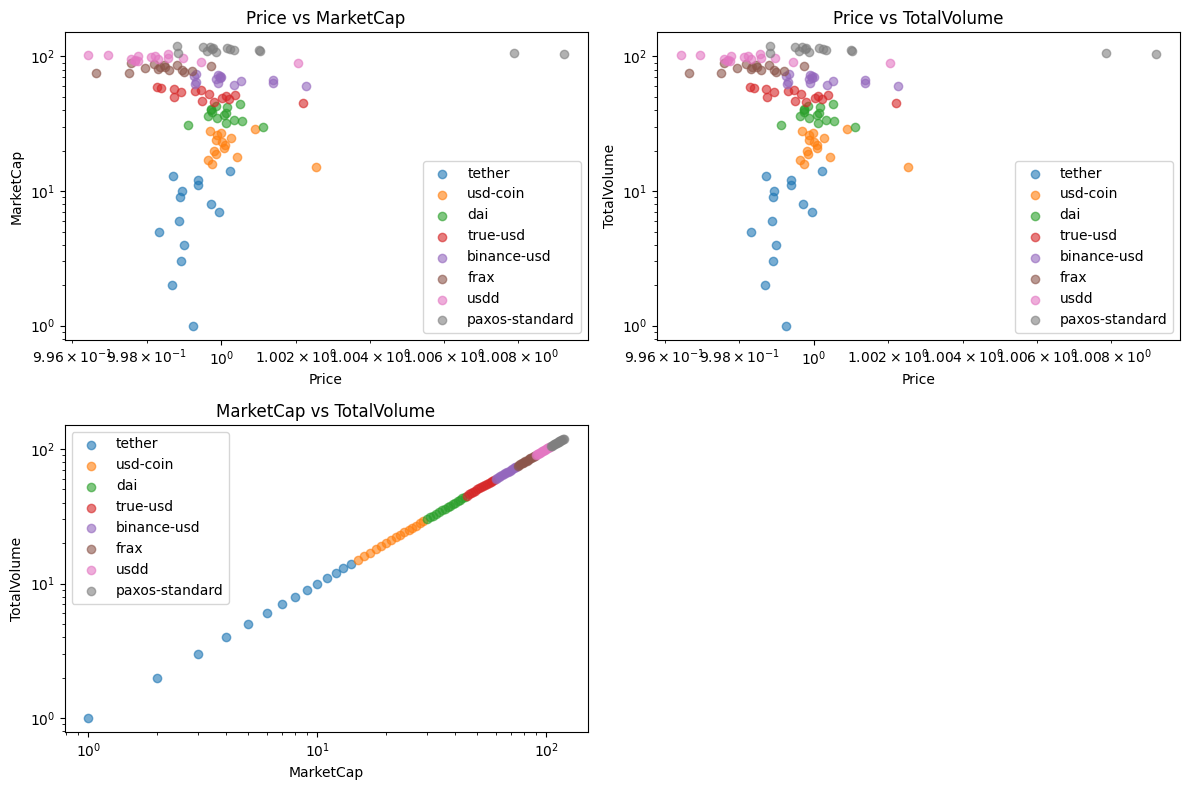

In [12]:
all_cryptocurrencies = df_cryptocurrency['Currency'].unique()

sample_cryptocurrencies = all_cryptocurrencies[:8]

df_sample = df_cryptocurrency[df_cryptocurrency['Currency'].isin(sample_cryptocurrencies)]

variable_combinations = [('Price', 'MarketCap'), ('Price', 'TotalVolume'), ('MarketCap', 'TotalVolume')]

plt.figure(figsize=(12, 8))
for var_x, var_y in variable_combinations:
    plt.subplot(2, 2, variable_combinations.index((var_x, var_y)) + 1)
    for crypto in sample_cryptocurrencies:
        subset = df_sample[df_sample['Currency'] == crypto]
        plt.scatter(subset[var_x], subset[var_y], label=crypto, alpha=0.6)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.xscale('log')  
    plt.yscale('log')
    plt.legend()
    plt.title(f'{var_x} vs {var_y}')

plt.tight_layout()
plt.show()

- El primer gráfico muestra el precio frente al capital de mercado. El precio es el valor actual de una unidad de criptomoneda, y el capital de mercado es el valor total de todas las unidades en circulación. Se puede observar que hay una correlación positiva entre el precio y el capital de mercado, es decir, a mayor precio, mayor capital de mercado. Sin embargo, también se puede ver que hay mucha variación en el precio y el capital de mercado de las diferentes criptomonedas. Por ejemplo, la criptomoneda “usd-coin” tiene un precio y un capital de mercado muy bajos, mientras que la criptomoneda “tether” tiene un precio y un capital de mercado muy altos.

- El segundo gráfico muestra el precio frente al volumen total. El volumen total es la cantidad de criptomonedas que se han negociado en un período determinado. Se puede observar que hay una correlación negativa entre el precio y el volumen total, es decir, a menor precio, mayor volumen total. Esto puede deberse a que las criptomonedas con precios bajos son más accesibles y líquidas para los inversores y comerciantes. Por ejemplo, la criptomoneda “binance-usd” tiene un precio bajo y un volumen total alto, mientras que la criptomoneda “frax” tiene un precio alto y un volumen total bajo.

- El tercer gráfico muestra el capital de mercado frente al volumen total. Se puede observar que hay una correlación positiva entre el capital de mercado y el volumen total, es decir, a mayor capital de mercado, mayor volumen total. Esto puede deberse a que las criptomonedas con mayor capital de mercado tienen más demanda y actividad en el mercado. Por ejemplo, la criptomoneda “tether” tiene un capital de mercado y un volumen total muy altos, mientras que la criptomoneda “paxos-standard” tiene un capital de mercado y un volumen total muy bajos.

2. Gráfico de líneas con áreas: se utiliza para representar la evolución y las tendencias de las criptomonedas en el período de tiempo.

- Cada línea del gráfico corresponde a una criptomoneda diferente, que se indica en la leyenda a la derecha del gráfico.

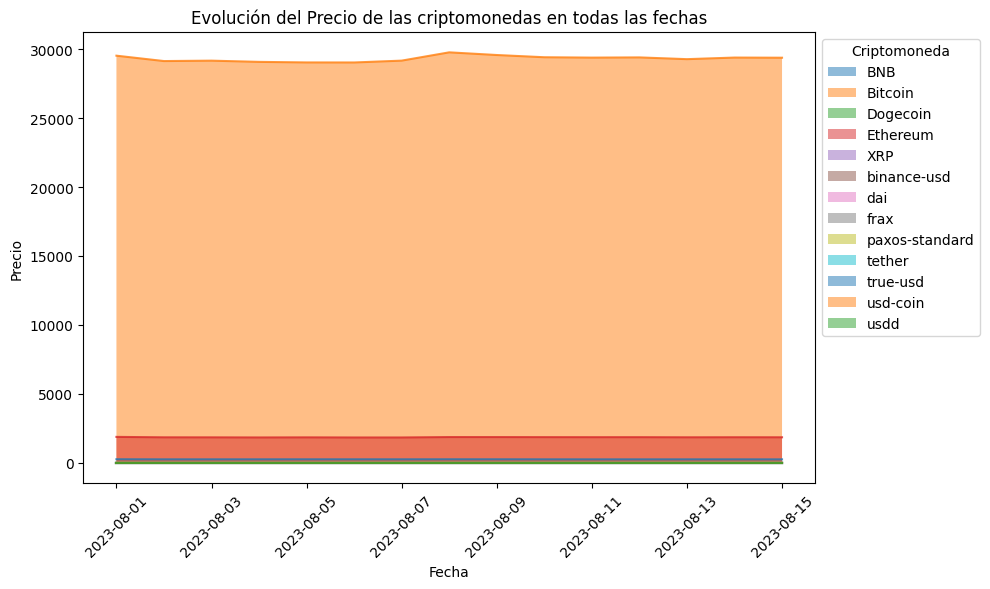

In [13]:
# Pivotear el DataFrame para tener las fechas como índice y las criptomonedas como columnas
pivot_df = df_cryptocurrency.pivot(index='Date', columns='Currency', values='Price')

# Crear un gráfico de líneas con áreas para el precio de cada moneda en todas las fechas
plt.figure(figsize=(10, 6))
for crypto in pivot_df.columns:
    plt.fill_between(pivot_df.index, pivot_df[crypto], label=crypto, alpha=0.5)
    plt.plot(pivot_df.index, pivot_df[crypto], alpha=0.8)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución del Precio de las criptomonedas en todas las fechas')
plt.xticks(rotation=45)
plt.legend(title='Criptomoneda', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Podemos concluir que:
- Bitcoin (BTC) es una criptomoneda con un valor mucho más alto en comparación con otras y ha experimentado un aumento significativo en su precio.
- Ethereum (ETH) tiene un valor sustancialmente menor en comparación con Bitcoin, pero sigue siendo una de las criptomonedas más valiosas. La diferencia en precios entre Bitcoin y Ethereum puede deberse a sus diferentes casos de uso y características técnicas.
- Las criptomonedas estables como Tether (USDT) y USD Coin (USDC) están diseñadas para mantener su valor cerca de 1 dólar. Por lo tanto, ver sus líneas cerca de 0 es un resultado esperado en un gráfico de precios en dólares.

3. Matriz de correlación: 

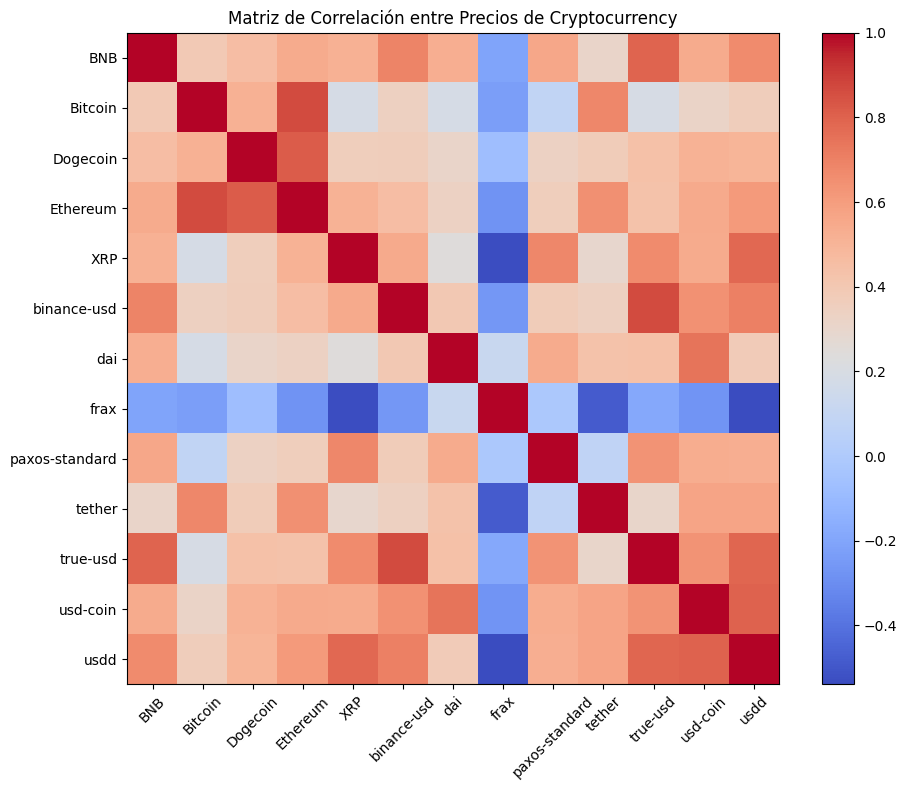

In [16]:
correlation_matrix = df_cryptocurrency.pivot_table(values='Price', columns='Currency', index='Date')

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Matriz de Correlación entre Precios de Cryptocurrency')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

Podemos observar de acuerdo a los colores correlaciones:
- Positivas: Las zonas de colores más cálidos (rojos) en la matriz indican correlaciones positivas entre las criptomonedas correspondientes. Esto significa que los precios de estas criptomonedas tienden a moverse en la misma dirección a lo largo del tiempo. Cuanto más intenso sea el tono de rojo, mayor será la correlación positiva entre las criptomonedas. Por ejemplo entre usd-coin, true-usd y dai., o entre BNB, SRP y Dogecoin.
- Negativas: Las áreas de colores más fríos (azules) indican correlaciones negativas entre las criptomonedas correspondientes. Esto significa que los precios de estas criptomonedas tienden a moverse en direcciones opuestas. Cuanto más intenso sea el tono de azul, mayor será la correlación negativa entre las criptomonedas. Por ejempo, paxos-standard con las demas. 
- Bajas o Nulas: Las áreas de colores más neutros (tonos cercanos al blanco) sugieren correlaciones bajas o nulas entre las criptomonedas correspondientes. Esto indica que los precios de estas criptomonedas no están fuertemente relacionados entre sí y pueden moverse de manera independiente. Por ejemplo, usd-coin, dai y true-usd con binance-coin, FRAX y USDD.

- Finalmente guardamos el dataframe como un archivo csv.

In [15]:
df_cryptocurrency.to_csv('cryptocurrency_final.csv', index=False)